In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import gc
gc.enable()

import warnings
warnings.filterwarnings("ignore")
pd.options.display.max_columns = None

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

# Import Data

In [6]:
filename = 'amazon_top_10_cats_50plus_ratings'
reviews = pd.read_pickle(filename + '.pkl')
print(reviews.shape)
reviews.head()

(13211253, 6)


,user_id,book_id,rating,review_text,title,category
83,A1DUEKGHT9F8GX,0001381733,5.0,gyo fujikawa is my favorite illustrator of thi...,a child's garden of verses,science fiction & fantasy
84,A11G2ZH0OXPNKV,0001381733,5.0,a child's garden of verses is a childhood stap...,a child's garden of verses,science fiction & fantasy
85,A23EB826EWC7EZ,0001381733,5.0,i have my father's book when he was a child bu...,a child's garden of verses,science fiction & fantasy
86,A1C0VN9HDW6MRS,0001381733,4.0,exactly like my childhood book. in very good s...,a child's garden of verses,science fiction & fantasy
87,A2EEX7S4T2HNCB,0001381733,5.0,"i had this book when i was a child, and all th...",a child's garden of verses,science fiction & fantasy


# EDA

In [7]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13211253 entries, 83 to 18635576
Data columns (total 6 columns):
 #   Column       Dtype  
---  ------       -----  
 0   user_id      object 
 1   book_id      object 
 2   rating       float64
 3   review_text  object 
 4   title        object 
 5   category     object 
dtypes: float64(1), object(5)
memory usage: 705.6+ MB


In [8]:
reviews.isnull().sum()

user_id           0
book_id           0
rating            0
review_text    3853
title             0
category          0
dtype: int64

In [9]:
reviews.user_id.nunique()

5366100

In [10]:
reviews.user_id.value_counts()

A18EEC1ENOT9YN    992
A1JMSX54DO3LOP    914
A26GE9ZG68SKIQ    733
A12K5Y2SEANYW0    692
ABRLCS0WRNOKX     685
                 ... 
A3D90XW7RC0KQK      1
A10SKI7ES8SRKA      1
A35FMZYUAGP14       1
A2JS87QHH8JNOB      1
A1I7IJ99Y78TU       1
Name: user_id, Length: 5366100, dtype: int64

In [11]:
reviews.title.nunique()

64367

In [12]:
reviews.book_id.nunique()

64998

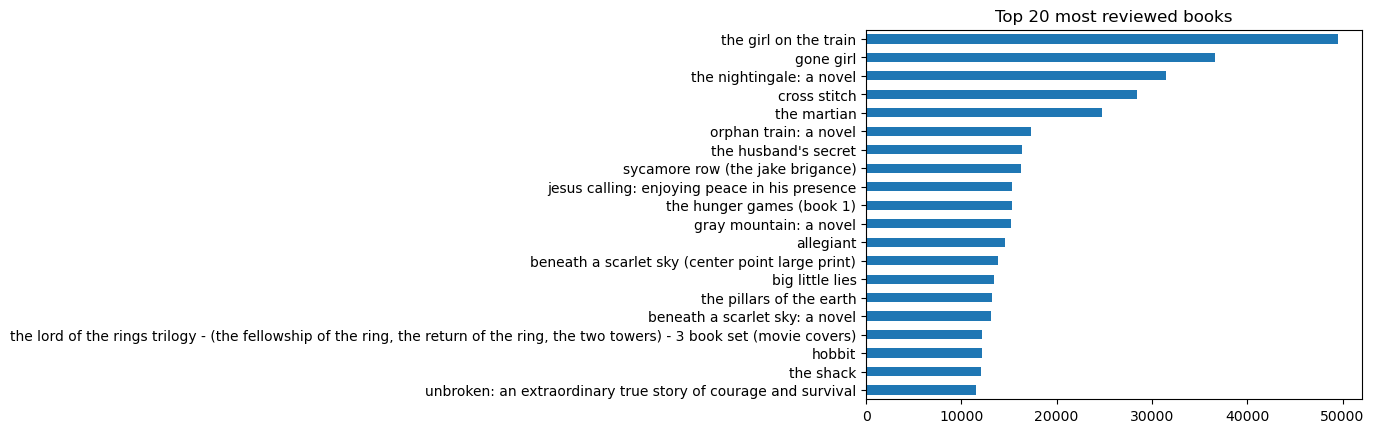

In [13]:
reviews.title.value_counts()[:20].plot(kind='barh')
plt.gca().invert_yaxis()
plt.title('Top 20 most reviewed books')
plt.show()

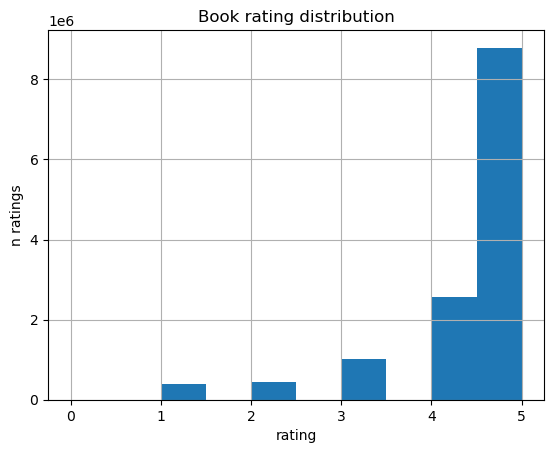

In [14]:
reviews.rating.hist()
plt.xlabel('rating')
plt.ylabel('n ratings')
plt.title('Book rating distribution')
plt.show()

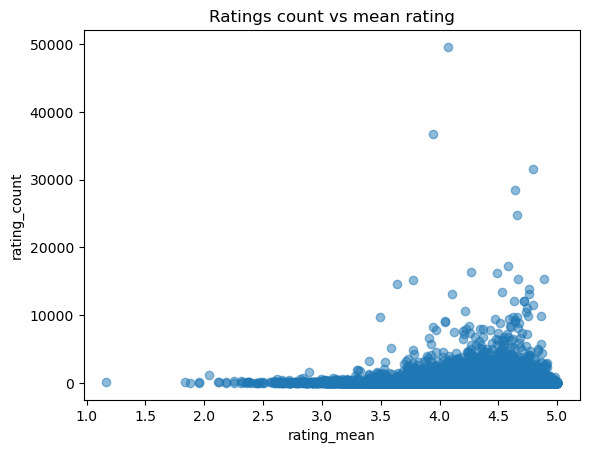

In [15]:
# avg rating to rating count scatterplot
rating_count_mean = (
    reviews.groupby('title', as_index=False).agg(
        rating_count=('rating','count'),
        rating_mean=('rating','mean')
    )
    .sort_values(by='rating_count', ascending=False)
)
plt.scatter(rating_count_mean.rating_mean, rating_count_mean.rating_count, alpha=0.5)
plt.title('Ratings count vs mean rating')
plt.ylabel('rating_count')
plt.xlabel('rating_mean')
plt.show()